In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("soheiltehranipour/apple-stock-20132018")

print("Path to dataset files:", path)

100%|██████████| 7.40k/7.40k [00:00<00:00, 12.4MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/soheiltehranipour/apple-stock-20132018/versions/1


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df=pd.read_csv("/content/AAPL.xls")

In [4]:
df.head()

,Date,Open
0,1/2/2013,79.117142
1,1/3/2013,78.268570
2,1/4/2013,76.709999
3,1/7/2013,74.571426
4,1/8/2013,75.601425


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1259 non-null   object 
 1   Open    1259 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.8+ KB


In [6]:
df.isna().sum()

,0
Date,0
Open,0


In [7]:
df.shape

(1259, 2)

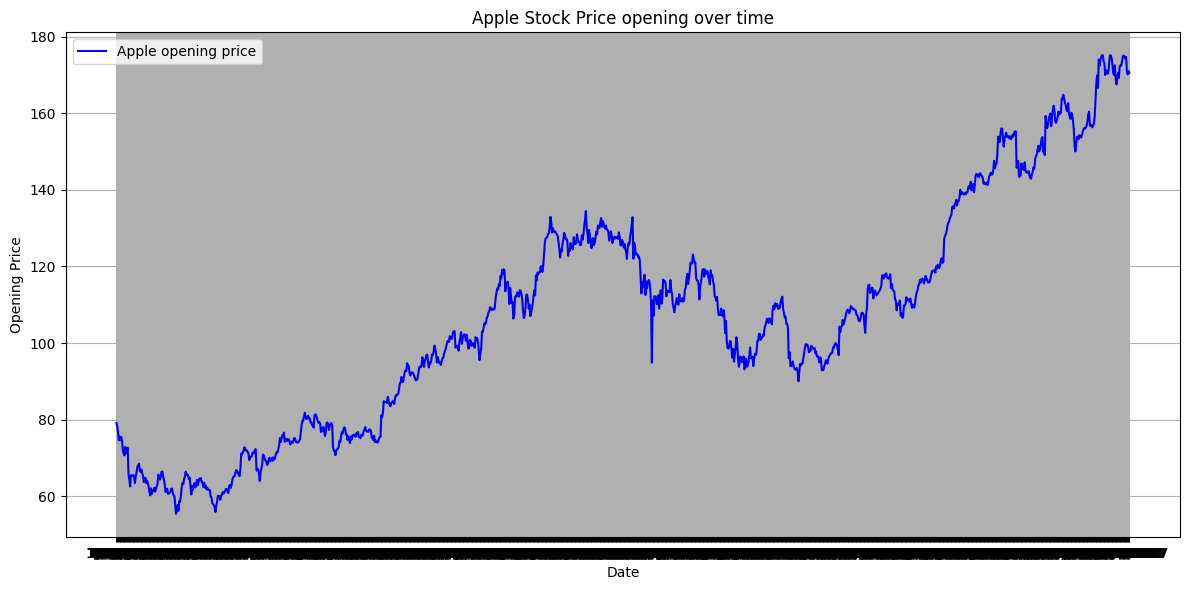

In [8]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'],df['Open'],label='Apple opening price',color='blue')
plt.title("Apple Stock Price opening over time")
plt.xlabel("Date")
plt.ylabel("Opening Price")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

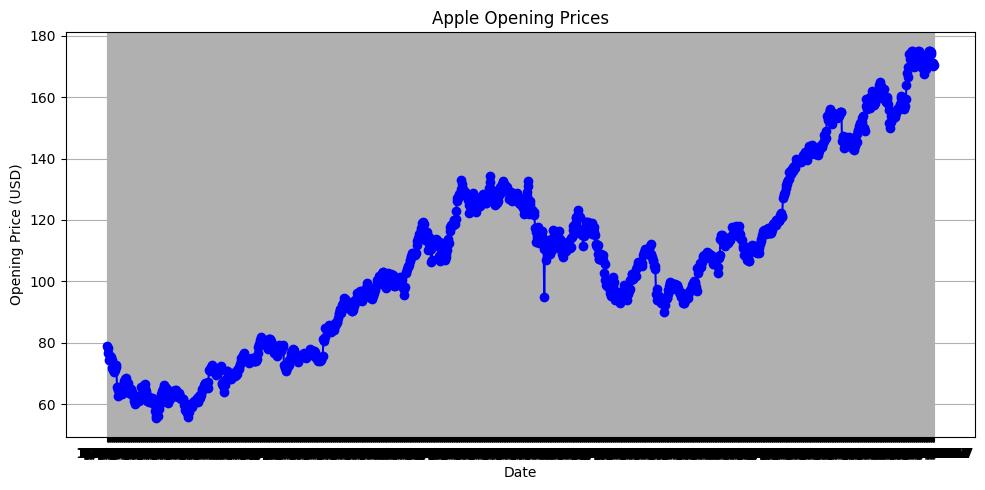

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Open'], marker='o', linestyle='-', color='blue')
plt.title('Apple Opening Prices')
plt.xlabel('Date')
plt.ylabel('Opening Price (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

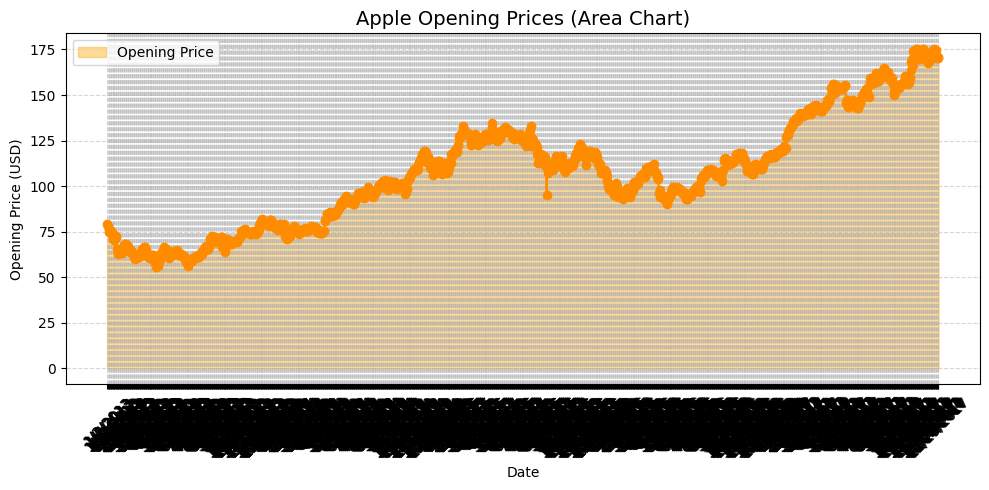

In [10]:
plt.figure(figsize=(10, 5))
plt.fill_between(df['Date'], df['Open'], color='orange', alpha=0.4, label='Opening Price')
plt.plot(df['Date'], df['Open'], color='darkorange', marker='o')
plt.title('Apple Opening Prices (Area Chart)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Opening Price (USD)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

open_Data=df['Open'].values.reshape(-1,1)

scaled_open=scaler.fit_transform(open_Data)

In [12]:
scaled_open

array([[-0.93981429],
       [-0.96846431],
       [-1.02108575],
       ...,
       [ 2.13200568],
       [ 2.16239184],
       [ 2.14618591]])

In [13]:
def create_sequences(data , window_size):
    X,y = [],[]

    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X) , np.array(y)

In [14]:
window_size = 7

X, y = create_sequences(scaled_open, window_size)

In [15]:
X

array([[[-0.93981429],
        [-0.96846431],
        [-1.02108575],
        ...,
        [-1.05851411],
        [-1.09087778],
        [-1.06169739]],

       [[-0.96846431],
        [-1.02108575],
        [-1.09328958],
        ...,
        [-1.09087778],
        [-1.06169739],
        [-1.09811264]],

       [[-1.02108575],
        [-1.09328958],
        [-1.05851411],
        ...,
        [-1.06169739],
        [-1.09811264],
        [-1.18647421]],

       ...,

       [[ 2.2511877 ],
        [ 2.29339097],
        [ 2.29845517],
        ...,
        [ 2.26941928],
        [ 2.28663805],
        [ 2.15563941]],

       [[ 2.29339097],
        [ 2.29845517],
        [ 2.29305301],
        ...,
        [ 2.28663805],
        [ 2.15563941],
        [ 2.13200568]],

       [[ 2.29845517],
        [ 2.29305301],
        [ 2.26941928],
        ...,
        [ 2.15563941],
        [ 2.13200568],
        [ 2.16239184]]])

In [16]:
y

array([[-1.09811264],
       [-1.18647421],
       [-1.20760006],
       ...,
       [ 2.13200568],
       [ 2.16239184],
       [ 2.14618591]])

In [17]:
X = X.reshape(X.shape[0], X.shape[1], 1)

In [18]:
X

array([[[-0.93981429],
        [-0.96846431],
        [-1.02108575],
        ...,
        [-1.05851411],
        [-1.09087778],
        [-1.06169739]],

       [[-0.96846431],
        [-1.02108575],
        [-1.09328958],
        ...,
        [-1.09087778],
        [-1.06169739],
        [-1.09811264]],

       [[-1.02108575],
        [-1.09328958],
        [-1.05851411],
        ...,
        [-1.06169739],
        [-1.09811264],
        [-1.18647421]],

       ...,

       [[ 2.2511877 ],
        [ 2.29339097],
        [ 2.29845517],
        ...,
        [ 2.26941928],
        [ 2.28663805],
        [ 2.15563941]],

       [[ 2.29339097],
        [ 2.29845517],
        [ 2.29305301],
        ...,
        [ 2.28663805],
        [ 2.15563941],
        [ 2.13200568]],

       [[ 2.29845517],
        [ 2.29305301],
        [ 2.26941928],
        ...,
        [ 2.15563941],
        [ 2.13200568],
        [ 2.16239184]]])

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X_train.shape

(1001, 7, 1)

In [21]:
y_train.shape

(1001, 1)

In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Dense,Input,LSTM,Dropout,BatchNormalization,Add,Bidirectional,Attention,LeakyReLU
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

In [23]:
def lstm_block_with_attention(x,units , return_sequences= False , dropout=0.2):
    residual = x

    x = Bidirectional(LSTM(units, return_sequences=True,kernel_regularizer=l2(0.001)))(x)
    x = Dropout(dropout)(x)
    x = BatchNormalization()(x)

    attention = Attention()([x,x])
    x = Add()([x,attention])

    if residual.shape[-1] != x.shape[-1]:
        residual = Dense(x.shape[-1])(residual)

    x = Add()([x,residual])

    return x

In [24]:
def model_build_lstm_attention(input_shape):
    inputs= Input(shape=input_shape)

    x = lstm_block_with_attention(inputs,512 , return_sequences=True)
    x = lstm_block_with_attention(x , 256 , return_sequences=True)
    x = lstm_block_with_attention(x,128, return_sequences=True)
    x = lstm_block_with_attention(x,64, return_sequences=False)

    for uni , rate in [(512,0.3) , (256,0.3) , (128,0.3) , (64,0.3) , (32,0.3)]:
        x = Dense(uni)(x)
        x = LeakyReLU(alpha=0.01)(x)
        x = Dropout(rate)(x)

    outputs = Dense(1)(x)

    model = Model(inputs=inputs , outputs=outputs)

    optimizer = Adam(learning_rate=1e-4)
    model.compile(optimizer,loss="mse",metrics=["mae"])

    return model

In [25]:
model = model_build_lstm_attention((7, 1))
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 7, 1)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 7, 1024)   │  2,105,344 │ input_layer[0][0] │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 7, 1024)   │          0 │ bidirectional[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 7, 1024)   │      4,096 │ dropout[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention           │ (None, 7, 1024)   │          0 │ batch_normalizat… │
│ (Attention)         │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 7, 1024)   │          0 │ batch_normalizat… │
│                     │                   │            │ attention[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 7, 1024)   │      2,048 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 7, 1024)   │          0 │ add[0][0],        │
│                     │                   │            │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_1     │ (None, 7, 512)    │  2,623,488 │ add_1[0][0]       │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 7, 512)    │          0 │ bidirectional_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 7, 512)    │      2,048 │ dropout_1[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_1         │ (None, 7, 512)    │          0 │ batch_normalizat… │
│ (Attention)         │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 7, 512)    │          0 │ batch_normalizat… │
│                     │                   │            │ attention_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 7, 512)    │    524,800 │ add_1[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 7, 512)    │          0 │ add_2[0][0],      │
│                     │                   │            │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_2     │ (None, 7, 256)    │    656,384 │ add_3[0][0]       │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 7, 256)    │          0 │ bidirectional_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 7, 256)    │      1,024 │ dropout_2[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 6,488,961 (24.75 MB)

 Trainable params: 6,485,121 (24.74 MB)

 Non-trainable params: 3,840 (15.00 KB)

In [26]:
history = model.fit(X_train, y_train, epochs=300, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 16s 83ms/step - loss: 14.0262 - mae: 2.4195 - val_loss: 4.6048 - val_mae: 0.8264
Epoch 2/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 5.9725 - mae: 1.1974 - val_loss: 4.5622 - val_mae: 0.8075
Epoch 3/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 5.1737 - mae: 0.9687 - val_loss: 4.4910 - val_mae: 0.7777
Epoch 4/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 4.8410 - mae: 0.8632 - val_loss: 4.4548 - val_mae: 0.7614
Epoch 5/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 4.6780 - mae: 0.7979 - val_loss: 4.4355 - val_mae: 0.7573
Epoch 6/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 4.4829 - mae: 0.7317 - val_loss: 4.4596 - val_mae: 0.7750
Epoch 7/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 4.3998 - mae: 0.6941 - val_loss: 4.4890 - val_mae: 0.7936
Epoch 8/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 4.2940 - mae: 0.6627 - val_loss: 4.4505 - val_mae: 0.7818
Epoch 9/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - 

In [37]:
y_pred = model.predict(X_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = np.argmax(y_pred, axis=1)

y_pred_inverse = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))

mae = mean_absolute_error(y_test_inverse, y_pred_inverse)
mse = mean_squared_error(y_test_inverse, y_pred_inverse)
rmse = mse ** 0.5

print(f"\nModel Performance:")
print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")


Model Performance:
MAE  : 134.65
MSE  : 22284.85
RMSE : 149.28
